In [1]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
RANDOM_SEED = 313

In [3]:
X,y = make_moons(n_samples=(1000,1000),shuffle=True,noise=0.3,random_state=RANDOM_SEED)

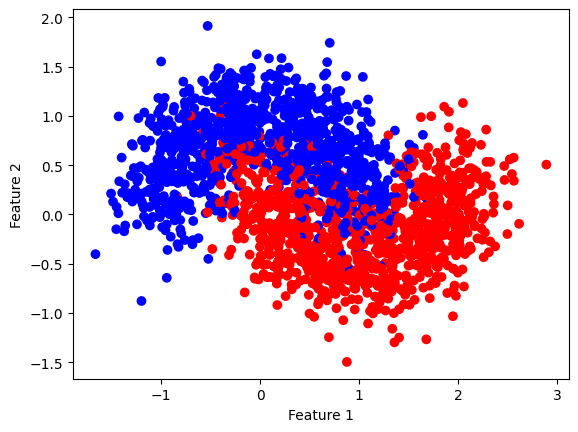

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=RANDOM_SEED,shuffle=True)

In [6]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr',LogisticRegression()),
        ('rfc',RandomForestClassifier(random_state=RANDOM_SEED)),
        ('svc',SVC(random_state=RANDOM_SEED))
    ]
)

In [7]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rfc', RandomForestClassifier(random_state=313)),
                             ('svc', SVC(random_state=313))])

In [8]:
for clf_name, clf in voting_clf.named_estimators_.items():
    print(f'{clf_name} = {clf.score(X_test,y_test)}')

lr = 0.8375
rfc = 0.8975
svc = 0.9025


In [9]:
voting_clf.score(X_test,y_test)

0.9

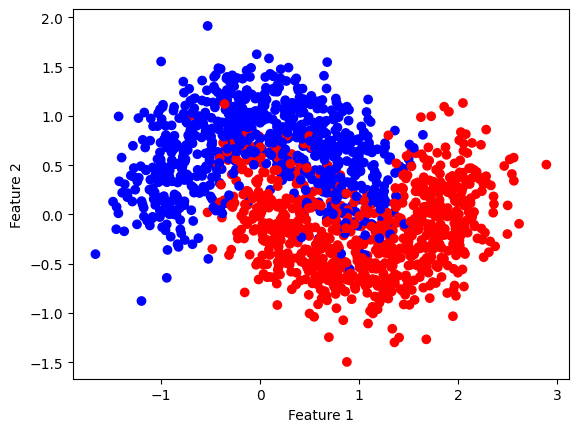

In [10]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.bwr)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [11]:
clf_list = list(voting_clf.named_estimators_.items())
clf_list

[('lr', LogisticRegression()),
 ('rfc', RandomForestClassifier(random_state=313)),
 ('svc', SVC(random_state=313))]

<Axes: >

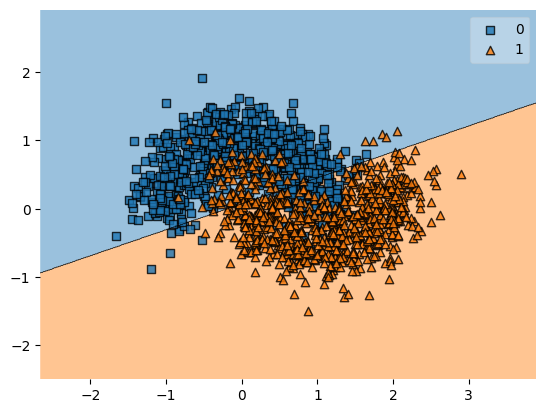

In [12]:
plot_decision_regions(X_train,y_train,clf_list[0][1])   # logistic regression

<Axes: >

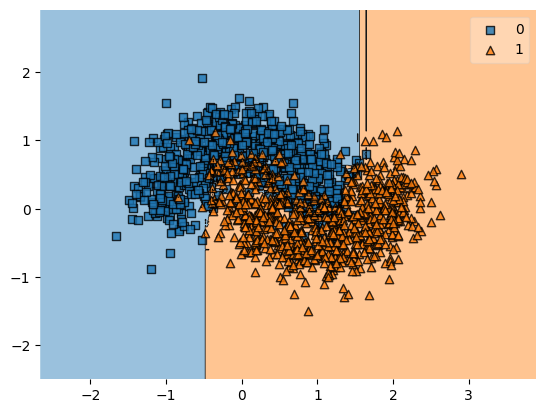

In [13]:
plot_decision_regions(X_train,y_train,clf_list[1][1])   # random forest

<Axes: >

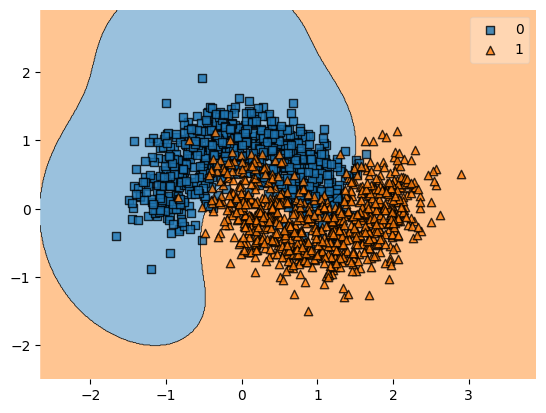

In [14]:
plot_decision_regions(X_train,y_train,clf_list[2][1])   # support vector classifier

In [15]:
voting_clf.predict(X_test[:1])

array([0])

In [16]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([0]), array([0]), array([0])]

### Soft Voting

In [17]:
voting_clf.voting = "soft"
voting_clf.named_estimators["svc"].probability = True

In [18]:
voting_clf.fit(X_train,y_train)
voting_clf.score(X_test,y_test)

0.8975